# Python之建模数值逼近篇

* 一维插值
* 二维插值
* OLS拟合（最小二乘拟合）

![](./img/P5_1.png)

![](./img/P5_2.png)

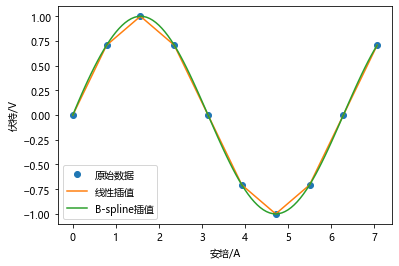

In [2]:
import numpy as np
import pylab as pl
from scipy import interpolate 
import matplotlib.pyplot as plt
# 设置中文字体
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

x = np.linspace(0, 2*np.pi+np.pi/4, 10)
y = np.sin(x)

x_new = np.linspace(0, 2*np.pi+np.pi/4, 100)
f_linear = interpolate.interp1d(x, y)
tck = interpolate.splrep(x, y)
y_bspline = interpolate.splev(x_new, tck)
# 可视化
plt.xlabel(u'安培/A')
plt.ylabel(u'伏特/V')
plt.plot(x, y, "o", label=u"原始数据")
plt.plot(x_new, f_linear(x_new), label=u"线性插值")
plt.plot(x_new, y_bspline, label=u"B-spline插值")
plt.legend()
plt.show()

![](./img/P5_3.png)

![](./img/P5_4.png)

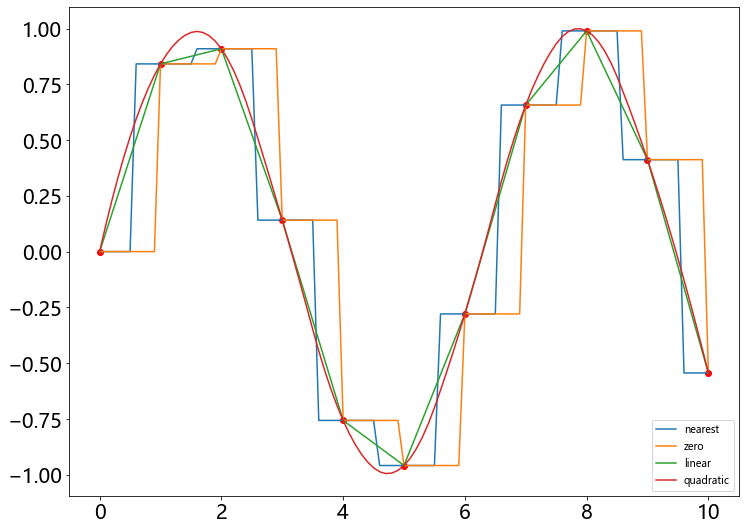

In [4]:
# 创建数据点集
import numpy as np
x = np.linspace(0, 10, 11)
y = np.sin(x)
# 绘制数据点集
import pylab as pl
pl.figure(figsize=(12, 9))
pl.plot(x, y, 'ro')
# 根据kind创建interp1d对象f，计算插值结果
xnew = np.linspace(0, 10, 101)
from scipy import interpolate
for kind in ['nearest','zero','linear','quadratic']:
    f = interpolate.interp1d(x, y, kind = kind)
    ynew = f(xnew)
    pl.plot(xnew, ynew, label = str(kind))
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.legend(loc='lower right')
pl.show()

![](./img/P5_5.png)

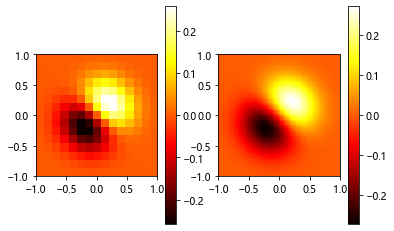

In [7]:
import numpy as np
from scipy import interpolate
import pylab as pl
import matplotlib as mpl

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

# X-Y轴分为15*15的网格
y, x = np.mgrid[-1:1:15j, -1:1:15j]  # np.mgrid[维度1，...,维度n] 唯独格式(a:b:cj), cj表点数
# 计算每个网格点上的函数值
fvals = func(x, y)
#三次样条二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')
# 计算100*100网格上插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
#ynew, xnew = np.mgrid[-1:1:100j, -1:1:100j]
fnew = newfunc(xnew, ynew)
# 可视化
# 让imshow的参数interpolation设置为'nearest'方便比较插值处理
pl.subplot(121)
im1 = pl.imshow(fvals, extent=[-1, 1, -1, 1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im1)
pl.subplot(122)
im2 = pl.imshow(fnew, extent=[-1, 1, -1, 1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im2)
pl.show()

![](./img/P5_6.png)

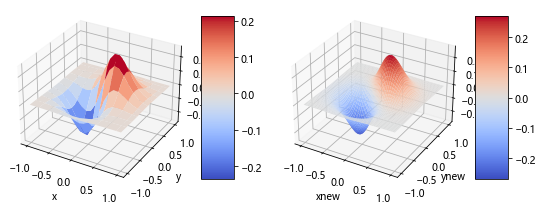

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
x, y = np.meshgrid(x, y)
fvals = func(x, y)
# 画分图1
fig = plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 2, 1, projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)  # cm.coolwarm：冷暖色调  antialiased：抗锯齿
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.colorbar(surf, shrink=0.5, aspect=5)  #添加颜色标注

# 二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')
# 计算100*100网格上的插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
fnew = newfunc(xnew, ynew)
xnew, ynew = np.meshgrid(xnew, ynew)
ax2 = plt.subplot(1, 2, 2, projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)  # cm.coolwarm：冷暖色调  antialiased：抗锯齿
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(xnew,ynew)')
plt.colorbar(surf2, shrink=0.5, aspect=5)  #添加颜色标注
plt.show()

![](./img/P5_7.png)

![](./img/P5_8.png)

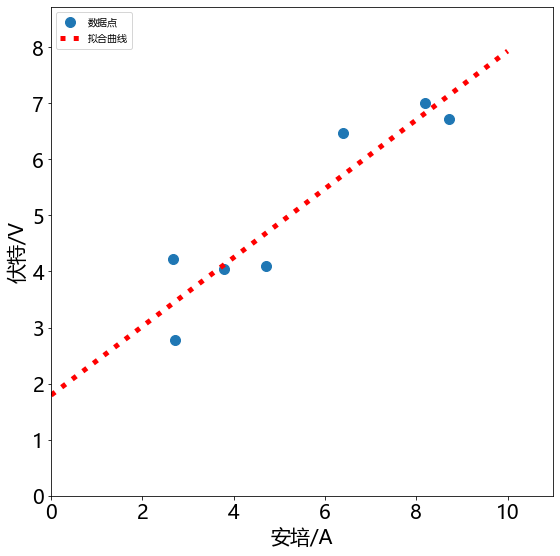

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

plt.figure(figsize=(9, 9))
X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])
# 计算以p为参数的直线与原始数据之间的误差
def f(p):
    k, b = p
    return (Y-(k*X+b))

# leastsq使得f的输出数组的平方和最小，参数初始值为[1, 0]
r = leastsq(f, [1, 0])
k, b = r[0]
plt.scatter(X, Y, s=100, alpha=1.0, marker='o', label=u'数据点')
x = np.linspace(0, 10, 1000)
y = k*x+b
ax = plt.gca()
#ax.get_xlabel(..., fontsize=20)
#ax.get_ylabel(..., fontsize=20)
plt.plot(x, y, color='r', linewidth=5, linestyle=":", markersize=20, label=u'拟合曲线')
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize='xx-large')
plt.xlabel(u'安培/A',fontsize=20)
plt.ylabel(u'伏特/V',fontsize=20)
plt.xlim(0, x.max() * 1.1)
plt.ylim(0, y.max() * 1.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left')
plt.show()